<a href="https://colab.research.google.com/github/mwelland/ENGPHYS_3NM4/blob/main/Assignments/Assignment_7_answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 7
Due EOD Thursday 21 November.
Discussion will be held on Monday Nov. 25 lab time.

#Q1. The Blasius equation is a Boundary Value Problem that appears in fluid mechanics as a laminar flow boundary layer and is written:

$$y^{\prime\prime\prime} + y y^{\prime\prime} = 0 \quad y(0) = y^\prime(0) = 0, y^\prime(\infty) = 2$$

In [ ]:
# prompt: solve the above problem\

import numpy as np
from scipy.integrate import solve_bvp

# Define the Blasius equation
def blasius_equation(x, y):
    y_prime = y[1]
    y_double_prime = y[2]
    y_triple_prime = -y[0] * y_double_prime
    return np.array([y_prime, y_double_prime, y_triple_prime])

# Define the boundary conditions
def boundary_conditions(ya, yb):
    return np.array([ya[0], ya[1], yb[1] - 2])

# Define the mesh points
x_range = np.linspace(0, 10, 1000)  # Adjust the range and number of points as needed

# Initial guess for the solution
y_initial = np.zeros((3, x_range.size))
y_initial[1, :] = x_range  # Improved initial guess

# Solve the boundary value problem
sol = solve_bvp(blasius_equation, boundary_conditions, x_range, y_initial, tol=1e-6, max_nodes=10000)

# Print the solution
print(sol.message)
if sol.success:
    print("Solution converged:")
    print("x values:", sol.x)
    print("y values:", sol.y[0])  # y(x)
    print("y' values:", sol.y[1])  # y'(x)
    print("y'' values:", sol.y[2])  # y''(x)
else:
    print("Solution did not converge. Try adjusting initial guess, tolerances, or mesh points.")
    print(sol.message)

# Optional: plot the solution
import matplotlib.pyplot as plt
if sol.success:
  plt.plot(sol.x, sol.y[0], label='y(x)')
  plt.plot(sol.x, sol.y[1], label='y\'(x)')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Blasius Solution')
  plt.legend()
  plt.grid(True)
  plt.show()

##a) Express this 3rd order ODE as a system of first order ODEs.
{answer}

$$ \begin{align}
y^{\prime\prime\prime} &= ((y^\prime)^\prime)^\prime \\
&= ((y_1^\prime)^\prime)^\prime \\
&= (y_2^\prime)^\prime \\
&= y_3^\prime \\
\end{align}$$

let $y_1 = y$

$$\begin{align}
y_1^\prime &= y_2 \\
y_2^\prime &= y_3 \\
y_3^\prime &= -y_1 y_3
\end{align}$$

with $y_1(0) = 0$, $y_2(0) = 0$, $y_2(\infty) = 2$.

## b) Solve this equation using the shooting method. Plot the solution $y$.
{Method, implementation, answer}

It is enough to solve the BVP for some finite boundary and to show that the function at that boundary is not changing (and will therefore continue to infinity).

[0, 0, 1.3279578323969647]


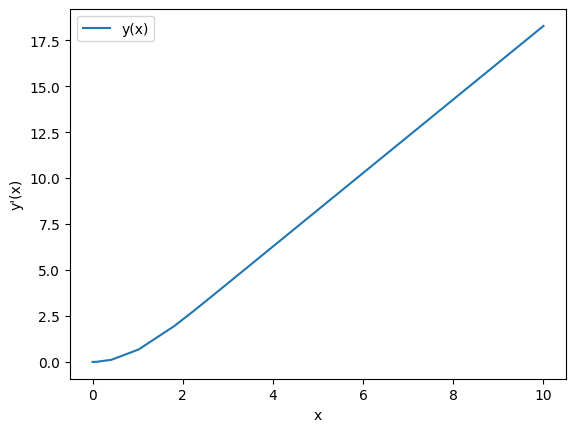

In [ ]:
# prompt: Solve the above problem using the shooting method

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

def f(x, y):
  """Defines the system of ODEs."""
  y1, y2, y3 = y
  dy1dx = y2
  dy2dx = y3
  dy3dx = -y1 * y3
  return [dy1dx, dy2dx, dy3dx]

def shooting_method(y_inf_target, x_span, initial_guess):
  """
  Solves the BVP using the shooting method.

  Args:
    y_inf_target: The desired value of y'(inf).
    x_span: The range of x values to solve for.
    initial_guess: An initial guess for y''(0).

  Returns:
    The solution y(x) if found.
  """

  def objective_function(y3_0):
    """
    Defines the objective function for the shooting method.
    """
    y0 = [0, 0, y3_0[0]]
    sol = solve_ivp(f, x_span, y0, method='RK45', dense_output=True)
    y_at_inf = sol.sol(x_span[-1])[1]
    return y_at_inf - y_inf_target

  # Use a root-finding method (e.g., bisection or Newton-Raphson) to find y3_0
  # that satisfies the boundary condition at infinity.
  result = root(objective_function, 1)

  if result.success:
    y3_0 = result.x[0]
    y0 = [0, 0, y3_0]
    print(y0)
    sol = solve_ivp(f, x_span, y0, method='RK45', dense_output=True)
    return sol
  else:
    print("Failed to converge.")
    return None

# Define the range of x values and the target value for y'(inf)
x_span = [0, 10]  # Choose a large enough value for x_span[-1] to approximate infinity
y_inf_target = 2

# Make an initial guess for y''(0)
initial_guess = 1

solution = shooting_method(y_inf_target, x_span, initial_guess)


plt.plot(solution.t, solution.y[0], label='y(x)')
plt.xlabel('x')
plt.ylabel('y\'(x)')
plt.legend()
plt.show()

#Q2

The temperature in an annunlar pipe is given by:

$$\frac{\partial T}{\partial t} = \alpha \bigg[\frac{\partial^2 T}{\partial r^2}+\frac{1}{r} \frac{\partial T}{\partial r}\bigg] $$

The pipe is initially submerged in a perfect heat bath at $ 200^0C$ reaching uniform temperature.

At $t=0$, a fluid with high thermal mass at $0^0C$ is passed along the inside.

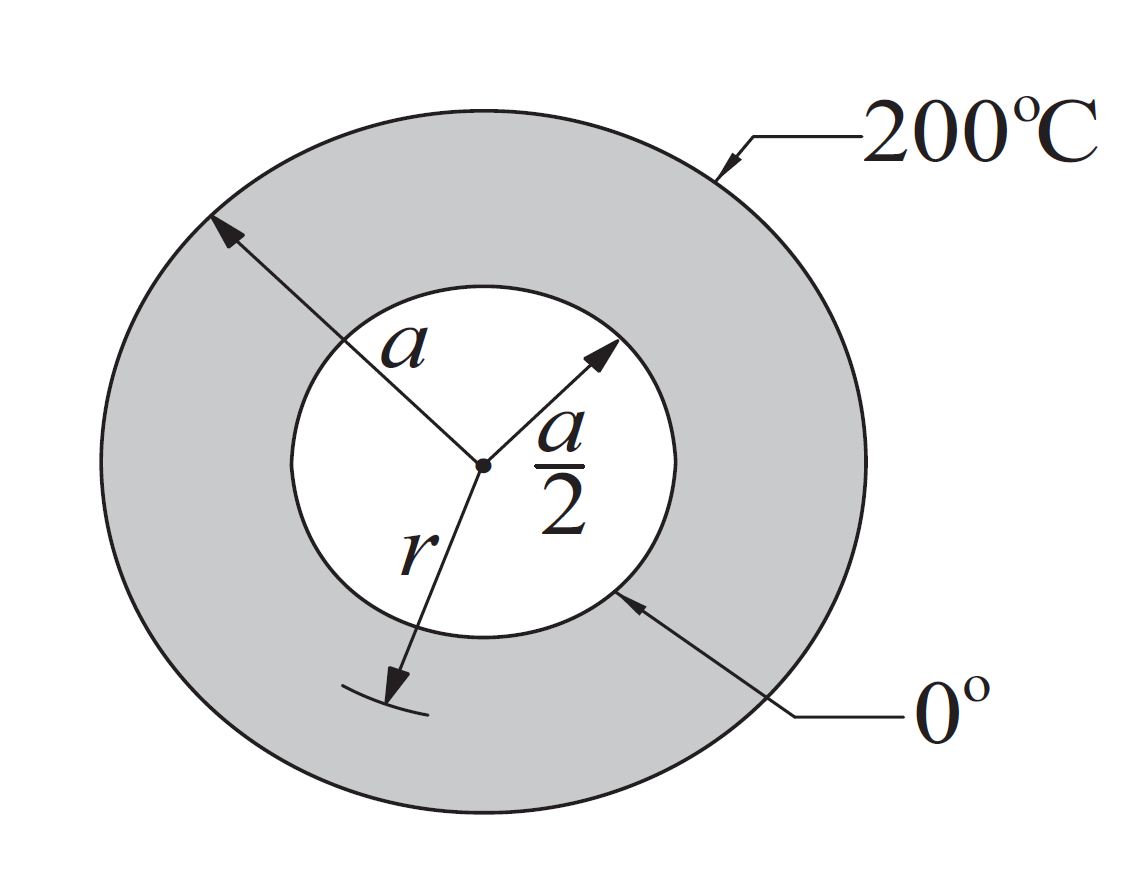

You are tasked with determining the steady state temperature profile.

## a) Write out (don't code it yet) an appropriate timestepping scheme. Explain your choice.
{Answer, Explaination}

This could be an explicit or implicit Euler scheme, or Crank Nicholson. They may nondimensionalize at this point or in the next section; both are correct.

**Explicit (Forward) Euler**: The easiest to implement since you don't have to worry about root finding, but you need to limit your timestep:

$\frac{T_i^{t+1} - T_i^t}{\alpha \Delta t}=   \frac{T_{i+1}^{t} - 2T_i^{t} + T_{i-1}^{t}}{\Delta r^2} + \frac{1}{r} \frac{T_{i+1}^{t} - T_{i-1}^{t}}{ 2 \Delta r} $

Max timestep: $\Delta t = \frac{{\Delta r}^2}{2 \alpha}$

**Backward Euler**: Good since it is unconditionally stable, but needs a root finder.

$\frac{T_i^{t+1} -T_i^t}{\alpha \Delta t} = \frac{T_{i+1}^{t+1} - 2T_i^{t+1} + T_{i-1}^{t+1}}{\Delta r^2} + \frac{1}{r} \frac{T_{i+1}^{t+1} - T_{i-1}^{t+1}}{ 2 \Delta r} $

**Crank-Nicholson** : Implicit so unconditionally stable, needs a root finder by higher order accuracy than Euler


$\frac{T_i^{t+1} -T_i^t}{\alpha \Delta t} = \frac{1}{2}\bigg[\frac{T_{i+1}^{t+1} - 2T_i^{t+1} + T_{i-1}^{t+1}}{\Delta r^2} + \frac{1}{r} \frac{T_{i+1}^{t+1} - T_{i-1}^{t+1}}{ 2 \Delta r} +\frac{T_{i}^{t+1} - 2T_i^{t} + T_{i-1}^{t}}{\Delta r^2} + \frac{1}{r} \frac{T_{i+1}^{t} - T_{i-1}^{t}}{ 2 \Delta r} \bigg]$



##b) Code your scheme and determine when you will reach steady state to within 1%
{method, time stepper implementaiton, steady state check, answer}

$$\|\frac{T(t)-T(t=\infty)}{T(t=\infty)}\|_2 = 0.01$$

Non dimensionalization:

Since we don't have $\alpha$ or $a$, we need to nondimensionalize the problem by defining new variables $\tilde{r} = a r$ such that $d\tilde{r} = a \ dr$ and $\tilde{t} = t a^2 \alpha$ such that $d\tilde{t} = dt \  a^2 \alpha$ and

$$\begin{align}
\frac{\partial T}{\partial t} &= \alpha \bigg[\frac{\partial^2 T}{\partial r^2}+\frac{1}{r} \frac{\partial T}{\partial r}\bigg]\\
\frac{\partial T}{\partial t} &=  \alpha a^2 \bigg[\frac{\partial^2 T}{\partial \tilde{r}^2}+\frac{1}{\tilde r} \frac{\partial T}{\partial \tilde{r}}\bigg] \\
\frac{\partial T}{\partial \tilde{t}} &=  \bigg[\frac{\partial^2 T}{\partial \tilde{r}^2}+\frac{1}{\tilde r} \frac{\partial T}{\partial \tilde{r}}\bigg]
 \end{align}$$

Note that the boundary conditions are now $T(r = a/2) = T(\tilde{r} = 1/2) = 0$
and $T(r = a) = T(\tilde{r} = 1) = 200$

Pragmatically, this don't really change the implementation if you use alpha = 1, and a = 1. You just have to interpret the result and the plots correctly.

The steady state can be obtained:
* Analytical steady state solution is $T(r) = 200 \bigg[ 1- \frac{\ln {r/a}}{\ln .5} \bigg]$
* Root find when the Right hand side of any of the above methods equals zero for the steady state.
* Taking the final step of the time dependent solver and back calculating, but to do this you would need sufficient time resolution (could be a problem if they use an implicit scheme).

Solving for hte steady state directly:
$0= \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta r^2} + \frac{1}{r} \frac{T_{i+1} - T_{i-1}}{ 2 \Delta r} $ with T(a/2) = 0 and T(a) = 200


Steady-state temperature profile:


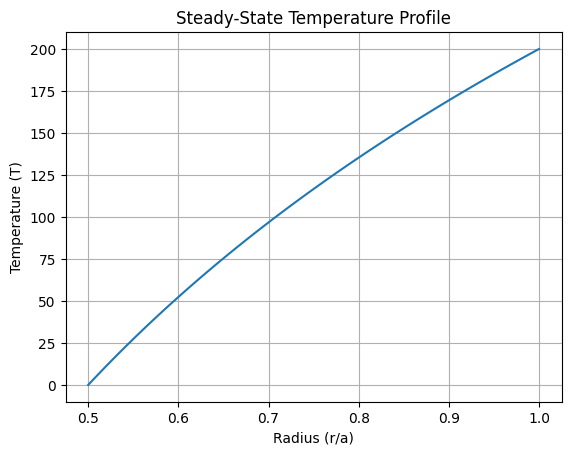

In [ ]:
# prompt: Solve the above equation using a root finder

import numpy as np
from scipy.optimize import root

def residual(T, dr, r_values):
  residuals = np.zeros_like(T)
  for i in range(1, len(T) - 1):
    residuals[i] = (T[i+1] - 2*T[i] + T[i-1]) / dr**2 + (T[i+1] - T[i-1]) / (2 * r_values[i] * dr)
  # Boundary conditions
  residuals[0] = T[0]  # T(a/2) = 0
  residuals[-1] = T[-1] - 200  # T(a) = 200
  return residuals


def solve_steady_state(a, dr, r_values):
  """Solves for the steady-state temperature profile.

  Args:
    a: Outer radius.
    nr: Number of radial points.

  Returns:
    Array of steady-state temperatures.
  """
  initial_guess = np.zeros(r_values.shape)#np.linspace(0, 200, int(r_values/dr))  # Initial guess for temperature

  # Use a root finder to solve for the steady-state temperature profile
  solution = root(residual, initial_guess, args=(dr, r_values))
  return solution.x


# Example usage:
a = 1.0  # Outer radius
dr = 0.01
r_inner = a / 2  # Inner radius of the pipe
nr = int((a - r_inner) / dr)  # Number of radial grid points
r_values = np.linspace(r_inner, a, nr)
steady_state_T = solve_steady_state(a, dr, r_values)

print("Steady-state temperature profile:")
steady_state_T


# dr = a / (len(steady_state_T) - 1)
# r_values = np.linspace(a/2, a, len(steady_state_T))

plt.plot(r_values, steady_state_T)
plt.xlabel("Radius (r/a)")
plt.ylabel("Temperature (T)")
plt.title("Steady-State Temperature Profile")
plt.grid(True)
plt.show()

Time dependant

time step:  5e-05
Steady state reached at time step 2011, t a^2 alpha  = 0.10055


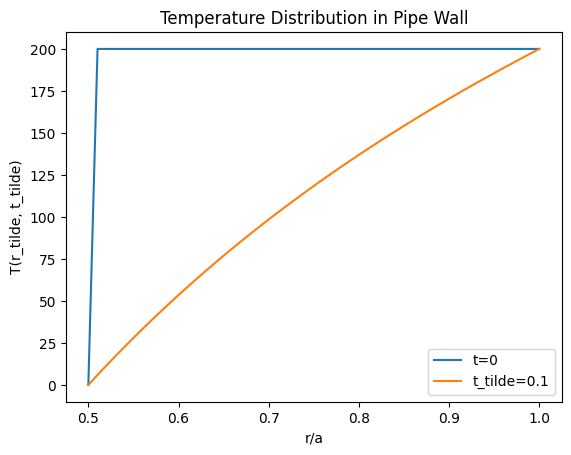

In [ ]:
# prompt: Solve the above heat transport problem in the tube wall using hte forward euler method
import numpy as np
import matplotlib.pyplot as plt
# Parameters
a = 1.0  # Outer radius of the pipe
r_inner = a / 2  # Inner radius of the pipe
alpha = 1  # Thermal diffusivity
dr = 0.01  # Radial step size
#dt = 0.00001  # Time step size

dt = dr**2/(2*a)
print('time step: ', dt)

t_final = 10  # Final time
nr = int((a - r_inner) / dr)  # Number of radial grid points
nt = int(t_final / dt)  # Number of time steps

# Create radial grid
r = np.linspace(r_inner, a, nr)

# Initial temperature distribution
T = 200*np.ones(nr)

# Boundary conditions
T[0] = 0  # Inner surface at 0 degrees
T[-1] = 200  # Outer surface at 200 degrees

# Forward Euler timestepping
def update_T(T, alpha, dr, dt, r):
    T_new = T.copy()
    for i in range(1, nr - 1):
        dTdr = (T[i+1] - T[i-1]) / (2 * dr)
        d2Tdr2 = (T[i+1] - 2*T[i] + T[i-1]) / (dr**2)
        T_new[i] = T[i] + alpha * dt * (d2Tdr2 + dTdr / r[i])
    return T_new

# Plotting
plt.figure()
plt.plot(r, T, label='t=0')


# Time loop
for n in range(nt):
    T = update_T(T, alpha, dr, dt, r)
    l2_norm = np.linalg.norm(T - steady_state_T) / np.linalg.norm(steady_state_T)

    # Check if the L2 norm is within 1%
    if l2_norm < 0.01:
        print(f"Steady state reached at time step {n+1}, t a^2 alpha  = {(n+1) * dt}")
        break



plt.plot(r, T, label=f't_tilde={round((n+1) * dt, 2)}')
plt.xlabel('r/a')
plt.ylabel('T(r_tilde, t_tilde)')
plt.title('Temperature Distribution in Pipe Wall')
plt.legend()
plt.show()